<a href="https://colab.research.google.com/github/anshg05/Machine-Learning-Lab/blob/main/prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Define the number of data points
num_samples = 1000

# Generate random data for features
num_visits = np.random.randint(1, 10, size=num_samples)  # Number of visits (1-10)
time_spent = np.random.randint(1, 3600, size=num_samples)  # Time spent on website (seconds, 1-3600)
age_group = np.random.choice(['18-25', '26-35', '36-45', '46-55', '55+'], size=num_samples)  # Age group categories
product_categories = np.random.choice(['Electronics', 'Clothing', 'Home & Kitchen', 'Books', 'Beauty'], size=num_samples)  # Product categories viewed

# Generate target variable (purchase likelihood) based on features
# Assume higher visits, longer time spent, and specific age groups/categories increase purchase likelihood
purchase_likelihood = np.zeros(num_samples)
for i in range(num_samples):
    score = 0
    score += num_visits[i] * 0.2  # Weight for number of visits
    score += time_spent[i] / 600  # Weight for time spent (per 10 minutes)
    if age_group[i] in ['26-35', '36-45']:
        score += 1  # Weight for age group
    if product_categories[i] in ['Electronics', 'Clothing']:
        score += 0.5  # Weight for product category
    purchase_likelihood[i] = 1 if score > 3 else 0  # Threshold for purchase

# Create a Pandas DataFrame
data = pd.DataFrame({
    'num_visits': num_visits,
    'time_spent': time_spent,
    'age_group': age_group,
    'product_categories': product_categories,
    'purchase': purchase_likelihood
})

# Save the dataset to a CSV file (optional)
#data.to_csv('e_commerce_dataset.csv', index=False)
data.head()

,num_visits,time_spent,age_group,product_categories,purchase
0,6,639,36-45,Books,1.0
1,1,170,46-55,Beauty,0.0
2,6,2067,18-25,Electronics,1.0
3,3,3269,46-55,Clothing,1.0
4,1,844,46-55,Electronics,0.0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [4]:
X = data[['num_visits', 'time_spent', 'age_group', 'product_categories']]
y = data['purchase']

In [5]:
X = pd.get_dummies(X, columns=['age_group', 'product_categories'], drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=50, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

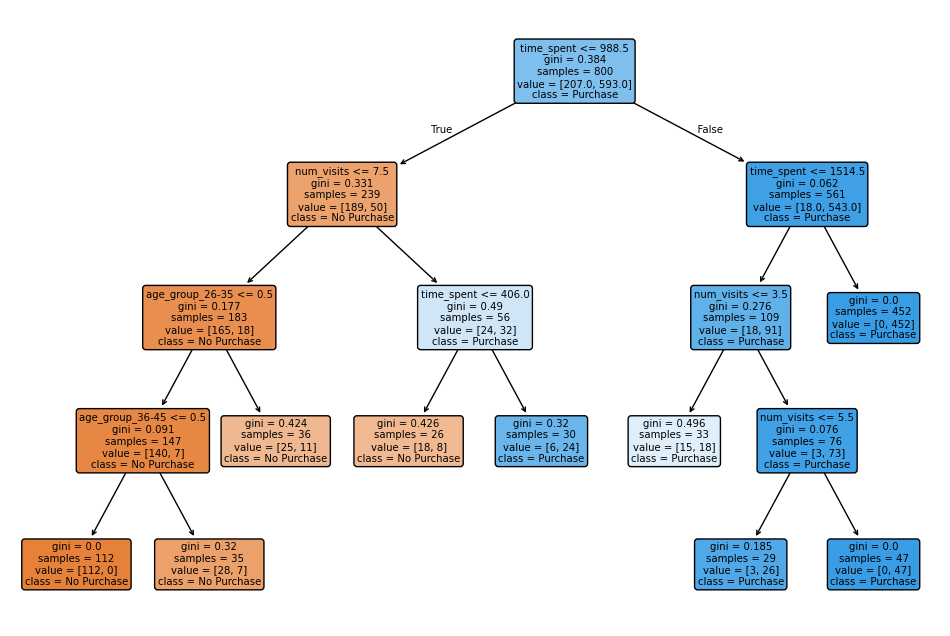

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.show()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.905
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75        35
         1.0       0.96      0.93      0.94       165

    accuracy                           0.91       200
   macro avg       0.83      0.86      0.84       200
weighted avg       0.91      0.91      0.91       200

